## **Лабороторная работа 2 "Кластерный анализ методом к-средних (k-means)"**

####**Экономика городов**

Данные описывают экономические условия в 48 городах мира в 1991 году.
Данные были собраны отделом экономических исследований банка Union (Швейцария).

Описаны экономические условия в 48 городах мира в 1991 году.

**Число наблюдений**: 48

**Переменные:**
| Название переменных | Описание |
|------------------|-----------|
| **City (Город)** | Название города |
| **Работа (Work)** | Взвешенное среднее числа рабочих часов, сосчитанное по 12 профессиям |
| **Цена (Price)** | Индекс цен 112 товаров и услуг, включая арендную плату за жилье (значение для Цюриха взято за 100%) |
| **Заработная плата (Salary)** | Индекс заработной платы за час работы, сосчитанный по 12 профессиям после налогов и вычетов (значение для Цюриха взято за 100%) |

#### **Подготовка данных**

In [ ]:
#Загружаем данные
!gdown 1CgelswAHDrIJA-evy5wF4zjIdBFNuq75

Downloading...
From: https://drive.google.com/uc?id=1CgelswAHDrIJA-evy5wF4zjIdBFNuq75
To: /content/Econom_Cities_data.csv
100% 1.18k/1.18k [00:00<00:00, 3.87MB/s]


In [ ]:
# Импортируем необходимые для работы библиотеки
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
# Импортируем данные
df = pd.read_csv('Econom_Cities_data.csv', sep=';', decimal=',', index_col='City')
df.head(10)

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Cairo,-9999,37.1,-9999.0
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9


In [ ]:
# Смотрим описательную статистику
df.describe()

,Work,Price,Salary
count,48.000000,48.000000,48.000000
mean,1384.958333,68.860417,-378.727083
std,2404.897007,21.784659,2027.338052
min,-9999.000000,30.300000,-9999.000000
25%,1740.750000,49.650000,12.250000
50%,1834.500000,70.500000,40.300000
75%,1972.750000,81.700000,58.700000
max,2375.000000,115.500000,100.000000


Замечаем, что значения min по столбцам 'Work' и 'Salary' составляют -9999, что не может быть правдой. Скорее всего, так обозначили пропущенные данные (NaN). Уберем эти значения из выборки.

In [ ]:
df = df.replace(-9999, np.nan).dropna(subset=['Work', 'Salary'])
df.describe()

,Work,Price,Salary
count,46.000000,46.000000,46.000000
mean,1879.913043,70.100000,39.545652
std,174.342552,21.389177,24.757703
min,1583.000000,30.300000,2.700000
25%,1745.250000,51.775000,14.375000
50%,1849.000000,70.950000,43.650000
75%,1976.250000,81.900000,59.700000
max,2375.000000,115.500000,100.000000


Следующим шагом необходимо стандартизировать данные, так как они имеют разные диапазоны значений и измеряются в разных величинах. Воспользуемся формулой StandardScaler (приведение к нулевому среднему и единичной дисперсии)

**Формула**
$$
\mathrm{StandardScaler} \;=\; \frac{\mathrm{x} - \mathrm{mean}}{\mathrm{std}}
$$

In [ ]:
# Стандартизируем
X = df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### **Кластерный анализ методом к-средних (k-means)**

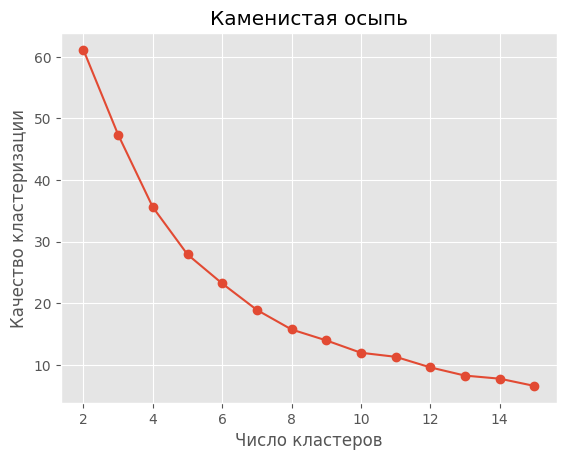

In [ ]:
#  Определяем число кластеров
K = range(2, 16)
models = [KMeans(n_clusters=k, random_state=42, max_iter=300, n_init=10,
               verbose=0, tol=0.0001).fit(X_scaled) for k in K]
dist = [model.inertia_ for model in models]

# Строим график "Каменистая осыпь"
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Качество кластеризации')
plt.title('Каменистая осыпь')

plt.show()

Анализируя график "Каменистая осыпь", можно отметить, что после 5 кластера качество кластеризации начинает ухудшаться (расстояние между точками становится меньше). Исходя из этого, **выделяем 5 кластеров**.

In [ ]:
# Строим модель K-means
model = KMeans(n_clusters=5, random_state=42, max_iter=300, n_init=10, verbose=0, tol=0.0001 )
model.fit(X_scaled)
df['cluster'] = model.labels_

In [ ]:
#  Выведем состав каждого кластера
df['cluster'].sort_values()

,cluster
City,
Bombay,0
Bogota,0
Caracas,0
Hong_Kong,0
Manila,0
Kuala_Lumpur,0
Singpore,0
Panama,0
Los_Angeles,1


In [ ]:
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,2146.875000,48.762500,12.412500
1,1990.833333,77.233333,55.316667
2,1732.000000,78.135714,53.614286
3,1868.750000,52.158333,17.458333
4,1780.500000,108.550000,71.300000


#### **Выводы**
На основе проведенного кластерного анализа методом к-средних (k-means) было выделено 5 кластеров.

**0 кластер** - города с низким уровне жизни, наблюдается низкий уровень заработных плат (при относительно высоком уровне цен) и одновременно максимальная продолжительность рабочего времени.

**1 кластер** - группа городов, где наблюдается приемлемый уровень цен при заработной плате выше среднего уровня, однако с повышенным значением продолжительности рабочего дня.

**2 кластер** - города, где наблюдается наиболее сбалансированная экономическая модель, все показатели находятся на "среднем" уровне.

**3 кластер** - группа городов с ограниченными экономическими возможностями, наблюдается сравнительно невысокий уровень цен и заработных плат, при этом длина рабочего дня умеренная.

**4 кластер** - города с высоким уровнем жизни, наблюдается максимальные значения индекса цен и индекса заработной платы, при этом сохраняя умеренную продолжительность рабочего дня.